In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

In [3]:
# Load the dataset
data = pd.read_csv('/content/50_Startups.csv')
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


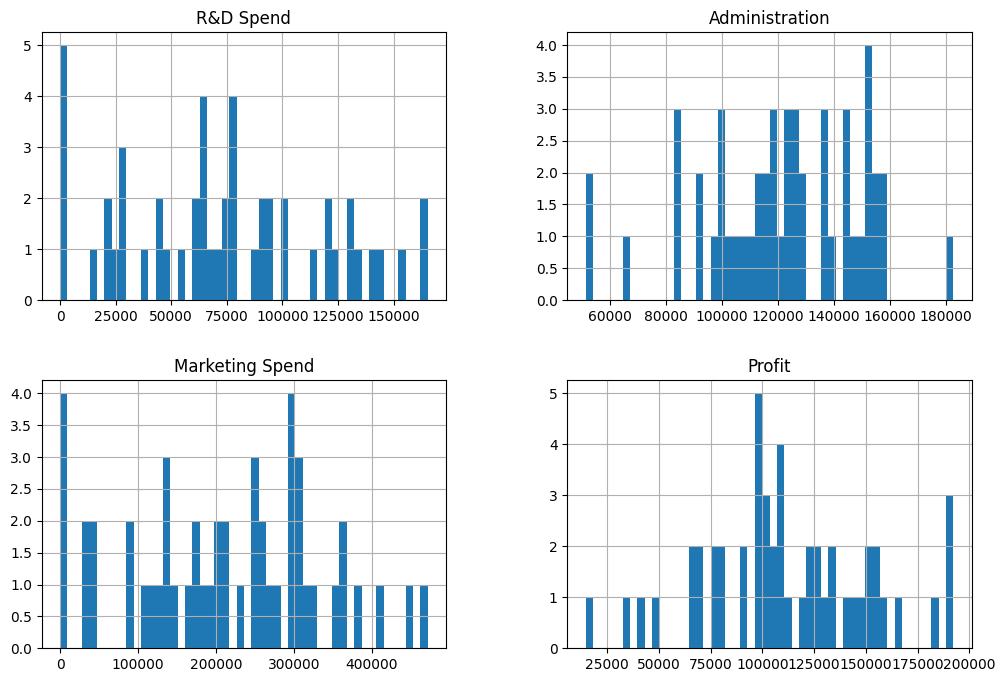

In [4]:
data.hist(bins=50, figsize=(12,8))
plt.show()

In [5]:
# Prepare the data for the first model (R&D Spend as independent variable)
X1 = data['R&D Spend'].values.reshape(-1, 1)
y = data['Profit']
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

In [6]:

# Create and train the first model
model1 = LinearRegression()
model1.fit(X1_train, y_train)

LinearRegression()

In [7]:
# Make predictions and evaluate the first model
y1_pred = model1.predict(X1_test)
mse1 = mean_squared_error(y_test, y1_pred)
r2_1 = r2_score(y_test, y1_pred)


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


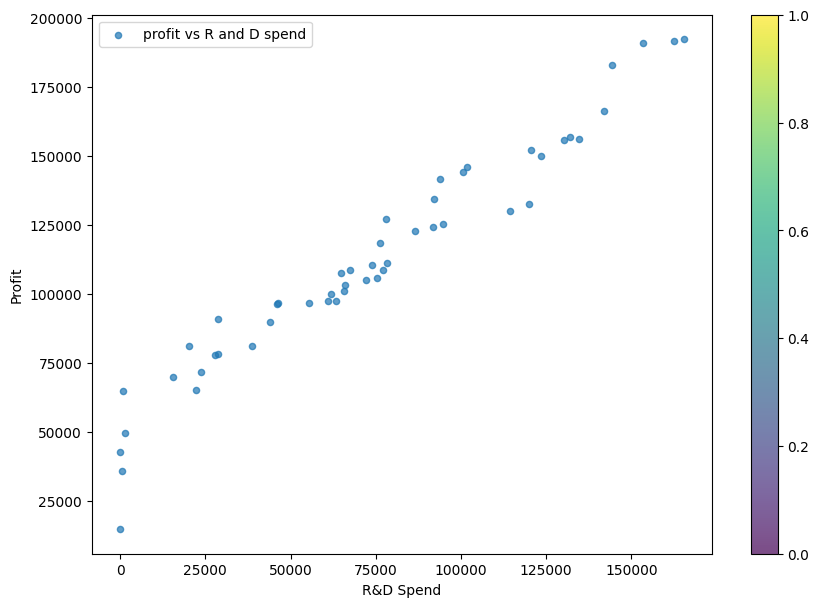

In [9]:
data.plot(kind="scatter", x="R&D Spend",y="Profit", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), label="profit vs R and D spend", alpha=0.7)
plt.show()#scatter plot

In [10]:
print("Model 1 (R&D Spend):")
print(f"Mean Squared Error: {mse1}")
print(f"intercept: {model1.intercept_}")
print(f"R-squared: {r2_1}")
print(
    f"Regression Equation: Profit = {model1.intercept_:.2f} + {model1.coef_[0]:.2f} * R&D Spend")

Model 1 (R&D Spend):
Mean Squared Error: 68473440.71905932
intercept: 48416.297661385026
R-squared: 0.9464587607787219
Regression Equation: Profit = 48416.30 + 0.85 * R&D Spend


In [11]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model1,f)

In [12]:
with open('model.pkl', 'rb') as f:
         clf2 = pickle.load(f)


In [13]:
   X1_test[0:5]

array([[ 66051.52],
       [100671.96],
       [101913.08],
       [ 27892.92],
       [153441.51]])

In [14]:
 clf2.predict(  X1_test[0:5])

array([104667.27805998, 134150.83410578, 135207.80019517,  72170.54428856,
       179090.58602508])

In [15]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y1_pred})
print(predictions.head())

       Actual      Predicted
28  103282.38  104667.278060
11  144259.40  134150.834106
10  146121.95  135207.800195
41   77798.83   72170.544289
2   191050.39  179090.586025


In [16]:
# Prepare the data for the second model (Marketing Spend as independent variable)
X2 = data['Marketing Spend'].values.reshape(-1, 1)
y = data['Profit']
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [17]:
# Create and train the second model
model2 = LinearRegression()
model2.fit(X2_train, y_train)

LinearRegression()

In [18]:
# Make predictions and evaluate the second model
y2_pred = model2.predict(X2_test)
mse2 = mean_squared_error(y_test, y2_pred)
r2_2 = r2_score(y_test, y2_pred)


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


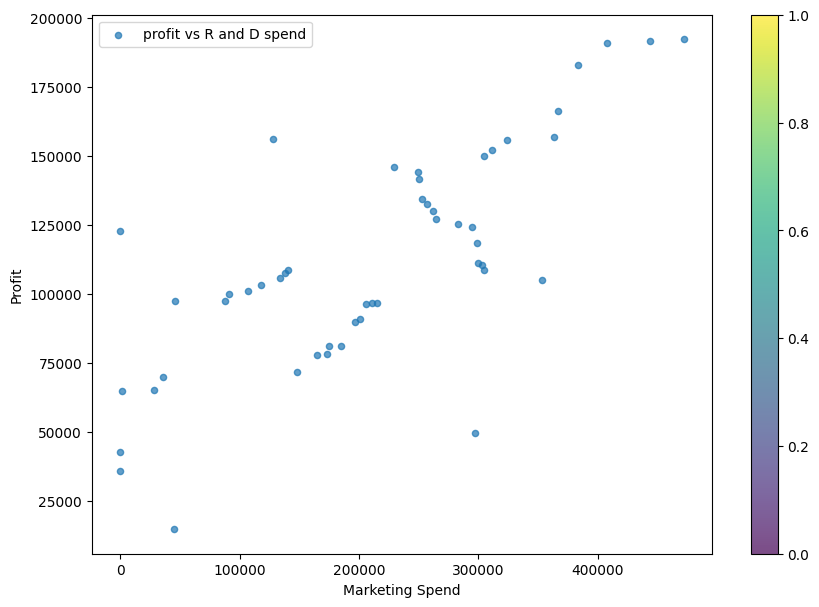

In [19]:
data.plot(kind="scatter", x="Marketing Spend",y="Profit", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), label="profit vs R and D spend", alpha=0.7)
plt.show()#scatter plot

In [20]:
print("\nModel 2 (Marketing Spend):")
print(f"Mean Squared Error: {mse2}")
print(f"R-squared: {r2_2}")
print(f"Regression Equation: Profit = {model2.intercept_:.2f} + {model2.coef_[0]:.2f} * Marketing Spend")


Model 2 (Marketing Spend):
Mean Squared Error: 651732592.4097881
R-squared: 0.49039262125463223
Regression Equation: Profit = 59707.03 + 0.25 * Marketing Spend


In [21]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model2,f)

In [22]:
with open('model.pkl', 'rb') as f:
         clf2 = pickle.load(f)

In [23]:
 clf2.predict(  X1_test[0:5])

array([75959.86408868, 84478.67101347, 84784.06463788, 66570.44714539,
       97463.3011325 ])

In [25]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y2_pred})
print(predictions.head())

       Actual      Predicted
28  103282.38   88778.925844
11  144259.40  121159.909380
10  146121.95  116095.048442
41   77798.83  100177.178407
2   191050.39  160084.601910
